# Preensemble

In [1]:
#define the colors from colorbrewer2
orange1 = '#feedde'
orange2 = '#fdbe85'
orange3 = '#fd8d3c'
orange4 = '#e6550d'
orange5 = '#a63603'
blue1 = '#eff3ff'
blue2 = '#bdd7e7'
blue3 = '#6baed6'     
blue4 = '#3182bd'     # passenger colour
blue5 = '#08519c'
green1 = '#edf8e9'
green2 = '#bae4b3'
green3 = '#74c476'   # dev colour
green4 = '#31a354'
green5 = '#006d2c'
grey1 = '#f7f7f7'
grey2 = '#cccccc'
grey3 = '#969696'
grey4 = '#636363'     # neutral drift colour
grey5 = '#252525'
purple1 = '#f2f0f7'
purple2 = '#cbc9e2'
purple3 = '#9e9ac8'
purple4 = '#756bb1'
purple5 = '#54278f'
red1 = '#fee5d9'
red2 = '#fcae91'
red3 = '#fb6a4a'
red4 = '#de2d26'
red5 = '#a50f15'

In [2]:
# Lists of colors for plots
c0 = (0.76, 0.76, 0.76)
c1 = (1.00, 0.18, 0.33);
c2 = (1.00, 0.23, 0.19);
c3 = (1.00, 0.58, 0.00);
c4 = (1.00, 0.80, 0.00);
c5 = (0.30, 0.85, 0.39);
c6 = (0.35, 0.78, 0.98);
c7 = (0.20, 0.67, 0.86);
c8 = (0.00, 0.48, 1.00);
c9 = (0.35, 0.34, 0.84);
c10 = (0.00, 0.31, 0.57);
c11 = (0.12, 0.29, 0.69);
c12 = (0.17, 0.17, 0.42);
c13 = (1.00, 1.00, 1.00);
c14 = (0.77, 0.04, 0.00);

In [3]:
# imported packages
import random
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import matplotlib.ticker as plticker
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.patches import Polygon
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib import cm
import scipy.special
import scipy.integrate as it
from scipy import integrate
from scipy.interpolate import interp1d
from scipy.stats import kde
import copy
import glob, os
import re
import pandas as pd
from decimal import *
from operator import itemgetter    
from collections import OrderedDict
import timeit
import csv
from scipy.integrate import simps

# Import data

In [4]:
from pyfaidx import Fasta

# define path_to_fa_file = <  >

hg19_genome = Fasta(path_to_fa_file)


### Import Lee Six data

In [5]:
#  single cell level
Lee_Six_et_al_data='Shearwater_calls_FDR0.95_all_muts.csv'


cell_dict={}
mutation_dict={}
NA_count_per_row={}
mut_VAF={}

n_germline = 0

with open(Lee_Six_et_al_data) as data:
    reader = csv.reader(data,delimiter=',')
    row_count=0

    next(reader, None)   #skips header
    for row in reader:
        row_count = row_count + 1
        count=float(row[144])
        mutation_dict[row_count]=count
        num_NA_in_row = 0
        
#         there are 140 colonies
        for i in range(140):
            mut_presence= str(row[4+i])
            if mut_presence == 'NA':
                num_NA_in_row = num_NA_in_row + 1
            
#             for each colony create a list for the column in the csv file
            if i in cell_dict.keys():
                mut_presence_list=cell_dict[i]
                mut_presence_list.append(mut_presence)

                cell_dict[i]=mut_presence_list
                
            else:
                cell_dict[i]=[mut_presence]
              
            
#         for each mutation (i.e. row), calculate the VAF by considering the cell fraction it is present in
        NA_count_per_row[row_count] = num_NA_in_row
        num_determined_cells = 140 - num_NA_in_row
#         factor of 2 to take care of diploidy in theory
#        treating all mutations as heterozygous as is almost always true for somatic mutations
        vaf = count/((num_determined_cells)*2)
        mut_VAF[row_count] = vaf
#       germline variants had been removed in the original study
        if vaf >= 120/(140*2):
            n_germline = n_germline + 1
        

list_of_mut_VAF_Lee_Six = list(mut_VAF.values())
print('Number of somatic mutations present in the colonies:', len(list_of_mut_VAF_Lee_Six))
print('number of germline variants in this file is:', n_germline)

num_mutations_this_cell_list=[]      
num_undetermined_mut_status_list=[]
for i in range(140):
    num_mutations_this_cell=0
    num_undetermined_mut_status=0
    mut_presence_list = cell_dict[i]
#     print(len(mut_presence_list))
    for m in mut_presence_list:
        if m=='NA':
            num_undetermined_mut_status = num_undetermined_mut_status + 1
        else:
            num_mutations_this_cell = num_mutations_this_cell + int(m)
#     print(num_mutations_this_cell)
    num_mutations_this_cell_list.append(num_mutations_this_cell)
    num_undetermined_mut_status_list.append(int(num_undetermined_mut_status))
    
print('The average number of mutations in each cell is', np.mean(num_mutations_this_cell_list))
print('The list of number of undetermined positions for each cell is', num_undetermined_mut_status_list,'out of > 130,000 positions')

Number of somatic mutations present in the colonies: 130904
number of germline variants in this file is: 0
The average number of mutations in each cell is 1044.1357142857144
The list of number of undetermined positions for each cell is [1269, 12, 79, 14, 223, 810, 28, 182, 931, 3919, 155, 138, 777, 226, 301, 1013, 7204, 2207, 6215, 30, 2114, 367, 285, 1185, 328, 15689, 377, 23, 256, 9, 57, 2009, 54, 164, 14, 851, 9, 1381, 2199, 95, 347, 150, 9, 241, 39, 1742, 108, 191, 135, 48, 4, 196, 859, 2679, 1398, 477, 236, 50, 279, 60, 159, 87, 11, 317, 70, 40, 92, 1951, 1049, 20, 329, 154, 318, 148, 36, 3287, 191, 372, 198, 58, 395, 258, 55, 159, 140, 227, 237, 471, 8059, 6, 446, 206, 1585, 109, 1831, 108, 60, 52, 302, 240, 134, 22, 1214, 71, 67, 20, 751, 194, 42, 959, 204, 60, 961, 355, 630, 36, 174, 176, 1100, 456, 125, 107, 860, 4612, 131, 363, 401, 46, 259, 122, 67, 398, 153, 141, 653, 80, 116, 150, 416, 261] out of > 130,000 positions


### Import Chapman data

Right now it is very odd that in the 18 weeks dataset, the list of donor IDs is way more than 234 (quoted in paper). Instead the SNV file has 236 putative colonies. OTOH in the 8 week dataset, the list of donor list ahs exactly 277 IDs (as quoted in parper) but the SNV file has more columns than that.


It suggests that the SNV file is before cleanup and the donor IDs (??)

In [4]:

def comple(base):
    comple_base = 0
    if base == 'A' or base == 'a':
        comple_base = 'T'
    if base == 'T' or base == 't':
        comple_base = 'A'
    if base == 'C' or base == 'c':
        comple_base = 'G'
    if base == 'G' or base == 'g':
        comple_base = 'C'
        
    if comple_base == 0:
        print('input to comple', base)
        
    return str(comple_base)

def different_case(base):
    different_case =0
    if base == 'a':
        different_case = 'A'
    if base == 't':
        different_case = 'T'
    if base == 'c':
        different_case = 'C'
    if base == 'g':
        different_case = 'G'
    if base == 'A':
        different_case = 'a'
    if base == 'T':
        different_case = 't'
    if base == 'C':
        different_case = 'c'
    if base == 'G':
        different_case = 'g'
        
    if different_case == 0:
        print('input to different_case', base)
    return str(different_case)

def upper_case(base):
    upper_case =0
    if base == 'a':
        upper_case = 'A'
    if base == 't':
        upper_case = 'T'
    if base == 'c':
        upper_case = 'C'
    if base == 'g':
        upper_case = 'G'
    if base == 'A':
        upper_case = 'A'
    if base == 'T':
        upper_case = 'T'
    if base == 'C':
        upper_case = 'C'
    if base == 'G':
        upper_case = 'G'
        
    if upper_case == 0:
        print('input to upper_case', base)
    return str(upper_case)

### 18-week foetus 

In [11]:
# create the IDs for colonies
list_of_putative_colony_ID = ['PD41768ab', 'PD41768ac', 'PD41768ad', 'PD41768ae', 'PD41768ag', 'PD41768ah', 'PD41768ai', 'PD41768aj', 'PD41768ak', 'PD41768al', 'PD41768an', 'PD41768ao', 'PD41768ap', 'PD41768aq', 'PD41768ar', 'PD41768as', 'PD41768at', 'PD41768au', 'PD41768av', 'PD41768aw', 'PD41768ax', 'PD41768ay', 'PD41768az', 'PD41768bc', 'PD41768bd', 'PD41768be', 'PD41768bf', 'PD41768bg', 'PD41768bi', 'PD41768bj', 'PD41768bk', 'PD41768bl', 'PD41768bm', 'PD41768bn', 'PD41768bo', 'PD41768bq', 'PD41768br', 'PD41768bs', 'PD41768bt', 'PD41768bu', 'PD41768bv', 'PD41768bw', 'PD41768bx', 'PD41768c', 'PD41768cb', 'PD41768cd', 'PD41768cf', 'PD41768ch', 'PD41768ci', 'PD41768cj', 'PD41768ck', 'PD41768cl', 'PD41768cm', 'PD41768cn', 'PD41768cr', 'PD41768cs', 'PD41768ct', 'PD41768cu', 'PD41768cx', 'PD41768cy', 'PD41768cz', 'PD41768d', 'PD41768dc', 'PD41768dd', 'PD41768de', 'PD41768di', 'PD41768dj', 'PD41768dk', 'PD41768dl', 'PD41768dn', 'PD41768dp', 'PD41768dq', 'PD41768dr', 'PD41768ds', 'PD41768dt', 'PD41768du', 'PD41768dv', 'PD41768dw', 'PD41768dx', 'PD41768dy', 'PD41768dz', 'PD41768eb', 'PD41768ec', 'PD41768ed', 'PD41768ee', 'PD41768ef', 'PD41768eg', 'PD41768ei', 'PD41768ej', 'PD41768ek', 'PD41768el', 'PD41768en', 'PD41768eq', 'PD41768er', 'PD41768es', 'PD41768et', 'PD41768eu', 'PD41768ev', 'PD41768ew', 'PD41768ey', 'PD41768ez', 'PD41768f', 'PD41768fb', 'PD41768fc', 'PD41768fd', 'PD41768ff', 'PD41768fg', 'PD41768fh', 'PD41768fi', 'PD41768fj', 'PD41768fk', 'PD41768fl', 'PD41768fm', 'PD41768fn', 'PD41768fp', 'PD41768fq', 'PD41768fr', 'PD41768fs', 'PD41768ft', 'PD41768fu', 'PD41768fv', 'PD41768fw', 'PD41768fx', 'PD41768fy', 'PD41768fz', 'PD41768g', 'PD41768gb', 'PD41768gc', 'PD41768gd', 'PD41768ge', 'PD41768gf', 'PD41768gh', 'PD41768gj', 'PD41768gk', 'PD41768gl', 'PD41768gm', 'PD41768gn', 'PD41768gp', 'PD41768gr', 'PD41768gs', 'PD41768gv', 'PD41768gx', 'PD41768gy', 'PD41768gz', 'PD41768h', 'PD41768hb', 'PD41768hd', 'PD41768hi', 'PD41768hj', 'PD41768hk', 'PD41768hl', 'PD41768hn', 'PD41768ho', 'PD41768hq', 'PD41768hr', 'PD41768hs', 'PD41768hu', 'PD41768hv', 'PD41768hw', 'PD41768hx', 'PD41768hy', 'PD41768hz', 'PD41768ib', 'PD41768ic', 'PD41768id', 'PD41768ie', 'PD41768if', 'PD41768ig', 'PD41768ii', 'PD41768ij', 'PD41768ik', 'PD41768il', 'PD41768im', 'PD41768in', 'PD41768io', 'PD41768ip', 'PD41768iq', 'PD41768ir', 'PD41768is', 'PD41768it', 'PD41768iw', 'PD41768ix', 'PD41768iy', 'PD41768jb', 'PD41768jc', 'PD41768jd', 'PD41768je', 'PD41768jf', 'PD41768jg', 'PD41768jh', 'PD41768ji', 'PD41768jj', 'PD41768jk', 'PD41768jm', 'PD41768jn', 'PD41768jo', 'PD41768jp', 'PD41768jq', 'PD41768jr', 'PD41768js', 'PD41768ju', 'PD41768jw', 'PD41768jy', 'PD41768jz', 'PD41768k', 'PD41768kb', 'PD41768kc', 'PD41768kd', 'PD41768ke', 'PD41768kf', 'PD41768kg', 'PD41768kh', 'PD41768ki', 'PD41768kj', 'PD41768kl', 'PD41768km', 'PD41768kn', 'PD41768ko', 'PD41768kp', 'PD41768kq', 'PD41768kr', 'PD41768ks', 'PD41768kt', 'PD41768ku', 'PD41768l', 'PD41768n', 'PD41768o', 'PD41768p', 'PD41768q', 'PD41768r', 'PD41768t', 'PD41768u', 'PD41768v', 'PD41768x', 'PD41768y', 'PD41768z']
print('\nThere are', len(list_of_putative_colony_ID), 'putative colonies.')


# create column names for column containing VAF information 
list_of_colony_SNV_VAF_column_label = []
for putative_colony_ID in list_of_putative_colony_ID:
    VAF_column_label = putative_colony_ID + '_VAF'
    list_of_colony_SNV_VAF_column_label.append(VAF_column_label)



There are 236 putative colonies.


Since coverage per colony in the 18- week foetus is 12.2x, the  clonal mutations may be detected between $0.5\pm \sqrt{\frac{0.5}{12.2}}$, i.e. $30-70\%$ VAF. 

In [13]:
filename= "PD41768_colonies_SNV_information.csv"


lower_threshold_18wks = 0.3
upper_threshold_18wks = 0.7
row_count = 0
list_of_subclonal_VAFs_18wks = []
SNV_18wks = {}
likely_clonal_SNV_18wks = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile) 
    for row in read_reader:
        
        row_count = row_count + 1
        
        for VAF_column_label in list_of_colony_SNV_VAF_column_label:
            
            VAF = float(row[VAF_column_label])
            
            if VAF != 0 :
                list_of_subclonal_VAFs_18wks.append(VAF)
#     creating dictonary for each mutation, returns a list of [VAF and colony found] pairs             
            if row_count not in SNV_18wks.keys():
                SNV_18wks[row_count]= [[VAF_column_label, VAF]]
            else:
                tmp = SNV_18wks[row_count]
                tmp.append([VAF_column_label, VAF])
                SNV_18wks[row_count] = tmp              
#     creating dictonary for each mutation, returns a list of [VAF and colony found] pairs 
            if upper_threshold_18wks > VAF > lower_threshold_18wks:
                if row_count not in likely_clonal_SNV_18wks.keys():
                    likely_clonal_SNV_18wks[row_count]= [[VAF_column_label, VAF]]
                else:
                    tmp2 = likely_clonal_SNV_18wks[row_count]
                    tmp2.append([VAF_column_label, VAF])
                    likely_clonal_SNV_18wks[row_count] = tmp2
   
        
print('There are', len(SNV_18wks.keys()), 'recorded SNVs in the 18-week embryo in', len(list_of_colony_SNV_VAF_column_label),'putative colonies')
print('There are', len(likely_clonal_SNV_18wks.keys()), 'SNVs likely clonal in the 18-week embryo within', len(list_of_colony_SNV_VAF_column_label),'putative colonies')


There are 3632 recorded SNVs in the 18-week embryo in 236 putative colonies
There are 2113 SNVs likely clonal in the 18-week embryo within 236 putative colonies


## Plotting subclonal VAF in single-cell colonies

In [15]:
def error_bars(hist, normed_value, widths):
    
    errors={}
    n=0
    for i in list(hist):
        normalised_hist = i/(normed_value*widths)
        log_hist = np.log(normalised_hist)
        sqrt_hist = math.sqrt(i)
        if sqrt_hist == 1:
            upper_error = 1
            lower_error = 0.9
        if sqrt_hist !=1:
            upper_error = sqrt_hist
            lower_error = sqrt_hist
        normalised_upper_error = upper_error/(normed_value*widths)
        normalised_lower_error = lower_error/(normed_value*widths)
#         print('normalised_hist is of type', type(normalised_hist))
        errors[n]=(normalised_hist[0], normalised_upper_error[0], normalised_lower_error[0])
        n = n+1

    errors_corrected ={}
    for k, v in errors.items():
        binheight = v[0]
        log_binheight = np.log(v[0])
        upper_error = v[1]
        lower_error = v[2]
        log_upper_error = (np.log(upper_error+binheight))-log_binheight
        log_lower_error = log_binheight-(np.log(binheight-lower_error))
        errors_corrected[k] = (log_binheight, log_upper_error, log_lower_error)

    lower_err=[]
    upper_err=[]
    for k, v in errors_corrected.items():
        lower_error = v[2]
        upper_error = v[1]
        lower_err.append(lower_error)
        upper_err.append(upper_error)

    err = [tuple(lower_err),tuple(upper_err)]
    
    return err


def plot_log_hist_data_for_plot_solid_smaller_linear_in_VAF(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color):
    # study_VAFs is a list of strings
    
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(study_VAFs, bins=bin_size, range=(min(study_VAFs),max(study_VAFs)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    scale = 2.5
    axisfont=20*scale
    axislabelfont=36
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)


    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 24, fontweight = 'medium')
    ax1.set_ylabel('SNV density', fontsize = axislabelfont, labelpad = 12, fontweight = 'medium')



    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(3)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1


### Extended figure 2B

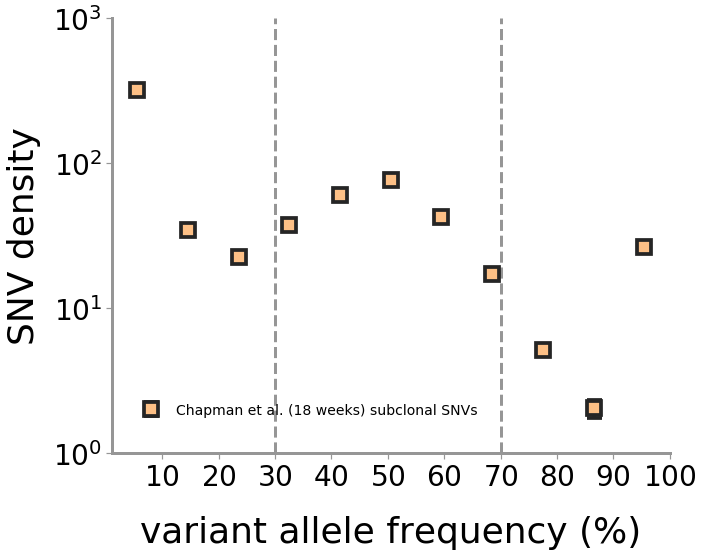

In [26]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 8))
font = {'weight' : 'normal','size'   : 16}

m_size = 11

Chapmanmarkersize = 14
Chapmanmarker='s'
Chapmantotal18wks = 1
Chapman_mut_rate = 0.5
Chapman_bins = 11
axisticklabelfontsize = 28

LeeSixmarkersize = m_size*0.9
LeeSixmarker='D'
LeeSixtotal = 1
LeeSix_mut_rate = 0.5
LeeSix_bins = 11

plt.axvline(x=upper_threshold_18wks, linestyle = '--', linewidth = 3, color = grey3)
plt.axvline(x=lower_threshold_18wks, linestyle = '--', linewidth = 3, color = grey3)

plot_log_hist_data_for_plot_solid_smaller_linear_in_VAF(list_of_subclonal_VAFs_18wks, len(list_of_colony_SNV_VAF_column_label), Chapman_bins, \
                            'Chapman et al. (18 weeks) subclonal SNVs', Chapmanmarker, Chapmanmarkersize, '#fdc086')


x_major_ticks = [0.1, 0.2, 0.3, 0.4,  0.5,  0.6,  0.7,  0.8,  0.9, 1]
x_major_tick_labels = ["$10$", "$20$", "$30$", "$40$", "$50$", "$60$", "$70$", "$80$", "$90$", "$100$"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisticklabelfontsize)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(10**0), np.log(10**1), np.log(10**2), np.log(10**3)]
y_major_tick_labels = ["$10^{0}$", "$10^{1}$", "$10^{2}$", "$10^{3}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisticklabelfontsize)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)



ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.35, 0.1), frameon=0, fontsize = 14)

# plt.savefig('Chapman_subclonal_VAFs_236_putative_colonies_18wks.pdf',bbox_inches='tight')


plt.show()


In [32]:
# only consider SNVs between 30-70% VAF
SNV_cell_count = {}
SNV_global_VAF = {}
for SNV_index, list_of_colony_ID in likely_clonal_SNV_18wks.items():
    cell_count = len(list_of_colony_ID)
    SNV_cell_count[SNV_index] = cell_count
#     account for diploidy in theory
    SNV_global_VAF[SNV_index] = cell_count/(2*len(list_of_colony_SNV_VAF_column_label))
    
# print(SNV_global_VAF)
list_vaf_18wk_haem = list(SNV_global_VAF.values())

### 8-week foetus  

In [22]:
#  Create list of colony IDs from the Github
filename= "colony_ID_8pcw.csv"
row_count = 0
list_of_colony_IDs = []
with open(filename, 'r') as csvfile:
    
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile
    
    for row in read_reader:
        
        colony_ID = str(row['Donor_ID'])
        list_of_colony_IDs.append(colony_ID)
   

print('\nlength of list of donor IDs from Github', len(list_of_colony_IDs))



length of list of donor IDs from Github 277


In [23]:
list_of_putative_colony_ID = list_of_colony_IDs
print('\nThere are', len(list_of_putative_colony_ID), 'putative colonies.')


# create column names for column containing VAF information 
list_of_colony_SNV_VAF_column_label = []
for putative_colony_ID in list_of_putative_colony_ID:
    VAF_column_label = putative_colony_ID + '_VAF'
    list_of_colony_SNV_VAF_column_label.append(VAF_column_label)




There are 277 putative colonies.


Since the coverage per colony in the 8-week foetus is 22.6x, the clonal mutations $0.5\pm \sqrt{\frac{0.5}{22.6}}$, i.e. $35-65\%$ VAF.

In [24]:
filename= "PD43947_colonies_SNV_information.csv"

lower_threshold_8wks = 0.35
upper_threshold_8wks = 0.65
row_count = 0
list_of_subclonal_VAFs_8wks = []
SNV_8wks = {}
likely_clonal_SNV_8wks = {}
with open(filename, 'r') as csvfile:
    read_reader = csv.DictReader(csvfile)  #csv.reader returns a reader object which will iterate over lines in the csvfile

    for row in read_reader:
        
        row_count = row_count + 1
        
        for VAF_column_label in list_of_colony_SNV_VAF_column_label:
            VAF = float(row[VAF_column_label])
            
            if VAF != 0 :
                list_of_subclonal_VAFs_8wks.append(VAF)
                
#     creating dictonary for each mutation, returns a list of [VAF and colony found] pairs             
            if row_count not in SNV_8wks.keys():
                SNV_8wks[row_count]= [[VAF_column_label, VAF]]
            else:
                tmp = SNV_8wks[row_count]
                tmp.append([VAF_column_label, VAF])
                SNV_8wks[row_count] = tmp
#     creating dictonary for each mutation, returns a list of [VAF and colony found] pairs                 
            if upper_threshold_8wks > VAF > lower_threshold_8wks:
                if row_count not in likely_clonal_SNV_8wks.keys():
                    likely_clonal_SNV_8wks[row_count]= [[VAF_column_label, VAF]]
                else:
                    tmp2 = likely_clonal_SNV_8wks[row_count]
                    tmp2.append([VAF_column_label, VAF])
                    likely_clonal_SNV_8wks[row_count] = tmp2
   
        
print('There are', len(SNV_8wks.keys()), 'recorded SNVs in the 8-week embryo in', len(list_of_colony_SNV_VAF_column_label),'putative colonies')
print('There are', len(likely_clonal_SNV_8wks.keys()), 'SNVs likely clonal in the 8-week embryo within', len(list_of_colony_SNV_VAF_column_label),'putative colonies')


There are 6894 recorded SNVs in the 8-week embryo in 277 putative colonies
There are 2338 SNVs likely clonal in the 8-week embryo within 277 putative colonies


### Extended figure 2A

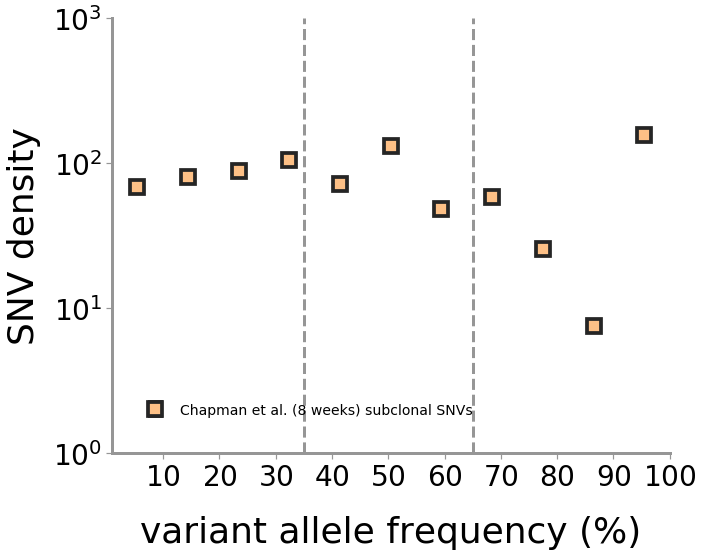

In [25]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 8))
font = {'weight' : 'normal','size'   : 16}


m_size = 11

Chapmanmarkersize = 14
Chapmanmarker='s'
Chapmantotal18wks = 1
Chapman_mut_rate = 0.5
Chapman_bins = 11
axisticklabelfontsize = 28

LeeSixmarkersize = m_size*0.9
LeeSixmarker='D'
LeeSixtotal = 1
LeeSix_mut_rate = 0.5
LeeSix_bins = 11

plt.axvline(x=upper_threshold_8wks, linestyle = '--', linewidth = 3, color = grey3)
plt.axvline(x=lower_threshold_8wks, linestyle = '--', linewidth = 3, color = grey3)

plot_log_hist_data_for_plot_solid_smaller_linear_in_VAF(list_of_subclonal_VAFs_8wks, len(list_of_colony_SNV_VAF_column_label), Chapman_bins, \
                            'Chapman et al. (8 weeks) subclonal SNVs', Chapmanmarker, Chapmanmarkersize, '#fdc086')



x_major_ticks = [0.1, 0.2, 0.3, 0.4,  0.5,  0.6,  0.7,  0.8,  0.9, 1]
x_major_tick_labels = ["$10$", "$20$", "$30$", "$40$", "$50$", "$60$", "$70$", "$80$", "$90$", "$100$"]
ax1.set_xticks(x_major_ticks)
ax1.set_xticklabels(x_major_tick_labels, fontsize = axisticklabelfontsize)
ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

y_major_ticks = [np.log(10**0), np.log(10**1), np.log(10**2), np.log(10**3)]
y_major_tick_labels = ["$10^{0}$", "$10^{1}$", "$10^{2}$", "$10^{3}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels, fontsize = axisticklabelfontsize)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)



ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.35, 0.1), frameon=0, fontsize = 14)

# plt.savefig('Chapman_subclonal_VAFs_277_putative_colonies_8wks.pdf',bbox_inches='tight')


plt.show()


In [28]:
# SNVs between 35-65% VAF
SNV_cell_count = {}
SNV_global_VAF = {}
for SNV_index, list_of_colony_ID in likely_clonal_SNV_8wks.items():
    cell_count = len(list_of_colony_ID)
    SNV_cell_count[SNV_index] = cell_count
#     account for diploidy in theory
    SNV_global_VAF[SNV_index] = cell_count/(2*len(list_of_colony_SNV_VAF_column_label))
    
# print(SNV_global_VAF)
list_vaf_8wk_haem = list(SNV_global_VAF.values())

# Plot graph

In [37]:
# define developmental model

def logProbtheory_ages_dev(l, u_dev, u_norm):
    
    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)/norm             

    return np.log(density)

def linProbtheory_ages_dev_for_integration(l, u_dev, u_norm): 
    
    norm=2*u_norm 
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1) /norm        

    return density

def linProbtheory_ages_dev_not_rescaled_for_integration(l, u_dev): 

    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)      

    return density


# not rescaled, used for optimization
def linProbtheory_ages_dev(l, u_dev):
    
    density= 2*u_dev/(np.log(2)*(2*np.exp(l))**1)         

    return density


In [30]:

# def plot_log_hist_data_for_plot_solid_smaller(study_VAFs, study_total, study_mu, bin_size, study_name, marker_name, marker_size, color):
#     # study_VAFs is a list of strings
    
#     #for plotting graphs that will not span the full width of the page and so will need larger markers
#     log_VAFs = []
#     for i in study_VAFs:
#         log_VAFs.append(np.log(float(i)))
#     normed_value = study_total*2*study_mu
# #     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
#     hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs),max(log_VAFs)))
#     widths = np.diff(bins)
# #     print('type of width', type(widths))
#     bin_centres = (bins[:-1] + bins[1:])/2
# #     hist = np.array(hist, dtype=float)
#     normalised_hist = hist/(normed_value*widths)
#     log_hist_for_plot = np.log(normalised_hist)
    
# #     print('hist is of type', type(hist))
#     errors = error_bars(hist, normed_value, widths)
  
#     axisfont=14*scale
#     axislabelfont=15*scale
#     tpfont = 14*scale

#     m_size = 18*scale
#     m_width = 1.5*scale
#     c_size = 3*scale
#     c_thick = 1.5*scale
#     e_width = 1.5*scale

  
#     Acunamarker = 'P'
#     Youngmarker = 'p'
#     Razavimarker = 's'
    
#     #Colors
#     DNMT3A_color = 'dodgerblue'
#     R882_color = c1
#     neutralcolor = c3
    
#     #Plot
#     ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
#                  elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
#                  markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    
#     # Set axis limits
#     ax1.set_ylim(1, np.log(100000))
#     ax1.set_xlim(-9, 0)
#     # ax1.set_xlim(-7.6, 0)

#     # Axis labels
#     ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
#     ax1.set_ylabel('relative density of variants', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

#     x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
#                      np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
#                      np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
#                      np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
#     x_major_tick_labels = ["0.01","","","","","","","","",\
#                            "0.1","","","","","","","","",\
#                            "1","","","","","","","","",\
#                            "10","","","","50","","","","",""]
#     ax1.set_xticks(x_major_ticks)
#     ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
#     ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

#     y_major_ticks = [np.log(10), np.log(20), np.log(30),\
#                      np.log(40), np.log(50), np.log(60), \
#                      np.log(70), np.log(80), np.log(90),\
#                      np.log(100), np.log(200), np.log(300), \
#                      np.log(400), np.log(500), np.log(600),\
#                      np.log(700), np.log(800), np.log(900), \
#                      np.log(1000), np.log(2000), np.log(3000),\
#                     np.log(4000), np.log(5000), np.log(6000), \
#                      np.log(7000), np.log(8000), np.log(9000),\
#                     np.log(10000), np.log(20000), np.log(30000), \
#                      np.log(40000), np.log(50000), np.log(60000),\
#                     np.log(70000), np.log(80000), np.log(90000), \
#                      np.log(100000), np.log(200000), np.log(300000), \
#                      np.log(400000), np.log(500000), np.log(600000),\
#                     np.log(700000), np.log(800000), np.log(900000), \
#                      np.log(1000000)]
#     y_major_tick_labels = ["","","", "", "", "", "", "", "", 
#                            "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", \
#                            "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$","", "", "", "", "", "", "", "", "$10^{6}$"]
#     ax1.set_yticks(y_major_ticks)
#     ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
#     ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

#     #Only show the required axis lines
#     ax1.spines['top'].set_visible(False)
#     ax1.spines['right'].set_visible(False)

#     for axis in ['bottom','left']:
#         ax1.spines[axis].set_linewidth(1.5)

#     for axis in ['bottom','left']:
#         ax1.spines[axis].set_color(grey3)
        
    
#     #set panel legends
#     legend_marker_size = 8*scale
 
#     return ax1

def plot_log_hist_data_for_plot_solid_no_normalization_average_to_max_VAF(study_VAFs, study_total, bin_size, study_name, marker_name, marker_size, color):
    
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    normed_value = study_total
#     bin_size = int((max(log_VAFs)-min(log_VAFs))/(1/((len(log_VAFs))**(1/3))))
    hist, bins = np.histogram(log_VAFs, bins=bin_size, range=(min(log_VAFs), np.log(0.4999)))
    widths = np.diff(bins)
#     print('type of width', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    normalised_hist = hist/(normed_value*widths)
    log_hist_for_plot = np.log(normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist, normed_value, widths)
  
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 18*scale
    m_width = 1.5*scale
    c_size = 3*scale
    c_thick = 1.5*scale
    e_width = 1.5*scale

  
    Acunamarker = 'P'
    Youngmarker = 'p'
    Razavimarker = 's'
    
    #Colors
    DNMT3A_color = 'dodgerblue'
    R882_color = c1
    neutralcolor = c3
    
    #Plot
    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    ax1.plot(bin_centres, log_hist_for_plot, color = color, zorder=3)
    
    # Set axis limits
#     ax1.set_ylim(1, np.log(100000))
    ax1.set_xlim(-9, 0)
    # ax1.set_xlim(-7.6, 0)

    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')
    ax1.set_ylabel('density of variants \n(not normalized by panel sizes)', fontsize = axislabelfont, labelpad = 6*1.2, fontweight = 'medium')

    x_major_ticks = [np.log(0.0001),np.log(0.0002),np.log(0.0003),np.log(0.0004),np.log(0.0005),np.log(0.0006),np.log(0.0007),np.log(0.0008), np.log(0.0009),\
                     np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]
    x_major_tick_labels = ["0.01","","","","","","","","",\
                           "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)

    y_major_ticks = [np.log(1), np.log(2), np.log(3), \
                     np.log(4), np.log(5), np.log(6), \
                     np.log(7), np.log(8), np.log(9), \
                     np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
    y_major_ticks = [c-np.log(10**4) for c in y_major_ticks]
    y_major_tick_labels = ["$10^{-4}$","","", "", "", "", "", "", "", "$10^{-3}$","", "", "", "", "", "", "", "", \
                           "$10^{-2}$","", "", "", "", "", "", "", "", "$10^{-1}$","", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)
        
    
    #set panel legends
    legend_marker_size = 8*scale
 
    return ax1



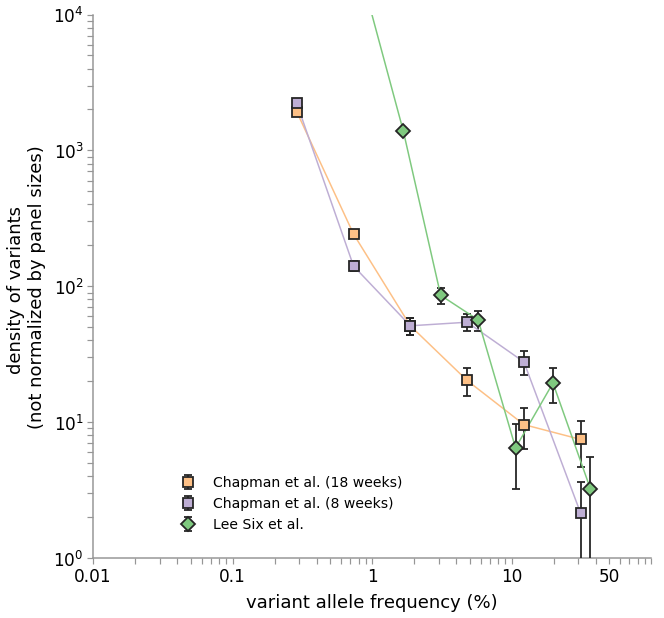

In [33]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

m_size = 11

Chapmanmarkersize = m_size*0.9
Chapmanmarker='s'
Chapmantotal18wks = 1
Chapmantotal8wks = 1
Chapman_bins = 6

LeeSixmarkersize = m_size*0.9
LeeSixmarker='D'
LeeSixtotal = 1
LeeSix_bins = 8

plot_log_hist_data_for_plot_solid_no_normalization_average_to_max_VAF(list_vaf_18wk_haem, Chapmantotal18wks,  Chapman_bins, \
                            'Chapman et al. (18 weeks)', Chapmanmarker, Chapmanmarkersize, '#fdc086')

plot_log_hist_data_for_plot_solid_no_normalization_average_to_max_VAF(list_vaf_8wk_haem, Chapmantotal8wks, Chapman_bins, \
                            'Chapman et al. (8 weeks)', Chapmanmarker, Chapmanmarkersize, '#beaed4')

plot_log_hist_data_for_plot_solid_no_normalization_average_to_max_VAF(list_of_mut_VAF_Lee_Six, LeeSixtotal,  LeeSix_bins, \
                            'Lee Six et al.', LeeSixmarker, LeeSixmarkersize, '#7fc97f')


y_major_ticks = [np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
y_major_ticks = [c+np.log(1/10**2) for c in y_major_ticks]
y_major_tick_labels = ["","","", "", "", "", "", "", "", 
                       "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                       "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", "$10^{4}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels)
ax1.set_ylim(np.log(10**0),np.log(10**4))
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.35, 0.1), frameon=0, fontsize = 14)

# plt.savefig('Chapman_all_SNVs_277_236_putative_colonies_before_removing_germline_variants.pdf',bbox_inches='tight')


plt.show()


### best-fit developmental mutation rate for Lee Six et al 

In [34]:
def VAF_densities_list(trimmed_VAF_list, study_total,  n_bins_syn, lmin, lmax):

    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
        
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)
    

    hist_without_zero=[]
    bin_centres_without_zero=[]
    for m in range(len(hist)):
        i = hist[m]
        if i != 0:
            hist_without_zero.append(i)
            bin_centres_without_zero.append(bin_centres[m])
#     print('hist without zero is', hist_without_zero)
#     print('bin_centres', len(bin_centres))
#     print('bin_centres_without_zero', len(bin_centres_without_zero))
    width_scalar=widths[0]
    normalised_hist = hist_without_zero/(normed_value*width_scalar)
#     print('width_scalar', width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
#     print('normalised_hist is', normalised_hist)
    
#     print('hist is of type', type(hist))
    errors = error_bars(hist_without_zero, normed_value, widths)

#     list_SD=[]
#     for i in list(hist_without_zero):
#         list_SD.append(1/math.sqrt(i))
#     print('SD:', list_SD)
        
    VAF_densities=[]
    lower_error = []
    upper_error = []
#     SD = []
    for i in errors[0]:
        lower_error.append(i)
    for i in errors[1]:
        upper_error.append(i)
#     for i in list_SD:
#         SD.append(i)
#     print('lower error:', lower_error)
#     print('upper error:', upper_error)
    VAF_densities_zip = zip(bin_centres_without_zero, log_hist_for_plot, lower_error, upper_error, hist)
    for a, b, c, d, e in VAF_densities_zip:
        VAF_densities.append((a, b, c, d, e))
        
    
        
    return VAF_densities

def cumulative_VAF_densities_list(trimmed_VAF_list, study_total, n_bins_syn, lmin, lmax):
    
    log_VAFs = []
    for i in trimmed_VAF_list:
        log_VAFs.append(np.log(float(i)))
    
#     these plots are not normalized by mutation rates: mutation rates are unknown 
    normed_value = study_total
    hist, bins = np.histogram(log_VAFs, bins=np.linspace(lmin, lmax, n_bins_syn))
    widths = np.diff(bins)
    bin_centres = (bins[:-1] + bins[1:])/2
#     hist = np.array(hist, dtype=float)

    
    normalised_hist = hist/(normed_value)
    log_hist_for_plot = np.log(normalised_hist)
    

        
    VAF_densities=[]

    VAF_densities_zip = zip(bin_centres, log_hist_for_plot, hist)
    
    for a, b, c in VAF_densities_zip:
        VAF_densities.append((a, b, c))
        
    
        
    return VAF_densities

def squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par(params, data, study_total, lmin, lmax, n_bins): 

    u_development = params[0]
    
    bin_size=(lmax-lmin)/(n_bins-1)
    
    normed_value = study_total
    
    total_square_distance = 0
    
    cumulative_data_density = 0
    
    predicted_cumulative_density = 0
    
    cumulative_num_data = 0
    
    if u_development>0:
    
        for datapoint in reversed(data):

            num_data = datapoint[2]

            logfreq = datapoint[0] 

            data_density = datapoint[1]

            cumulative_num_data = cumulative_num_data + num_data

            if logfreq+bin_size/2>np.log(0.5):
                predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, u_development)),\
                                         logfreq-bin_size/2, np.log(0.5))[0]
            else:
                predicted_density=integrate.quad(lambda l: (linProbtheory_ages_dev(l, u_development)),\
                                             logfreq-bin_size/2, logfreq+bin_size/2)[0]

            predicted_cumulative_density = predicted_cumulative_density + predicted_density

    #         if predicted_cumulative_density<0:
    #             print('predicted_cumulative_density is negative', 'u_development', u_development,'logfreq', logfreq)



            if data_density!= -(float('inf')):

                cumulative_data_density = cumulative_data_density + np.exp(data_density)  # is not nan

                square_distance = ((np.log(cumulative_data_density) - np.log(predicted_cumulative_density))**2)  
    # check if nan
                if square_distance!=square_distance:
                    print('cumulative_data_density', cumulative_data_density,'predicted_cumulative_density', predicted_cumulative_density,'at freq', np.exp(logfreq))

                SD = math.sqrt(cumulative_num_data)/(normed_value) 
                sigma_cumulative = np.log(cumulative_data_density+SD) - np.log(cumulative_data_density-SD)  
    # check if nan
                if sigma_cumulative != sigma_cumulative:
                    print('sigma_cumulative', sigma_cumulative, 'at freq', np.exp(logfreq))

                total_square_distance = total_square_distance + square_distance/sigma_cumulative**2  # weighted by error

    else:
#         make sure best-fit u is not negative
        total_square_distance=float('inf')

    return total_square_distance


In [35]:
# definte function for calculating 95% CI
scale=1.2
def confidence_interval_95_dev(mut_list, z1_HH_normalized, gene_color):

    cumulative_prob=0.0

    mut_95_range=[]
    mut_range_probs = []
    mut_cumulative_prob_95_range=[]
    for i in range(len(z1_HH_normalized)):
        mut=mut_list[i]
        p=z1_HH_normalized[i]
#         print(p)
        mut_range_probs.append((mut,p))
        cumulative_prob=cumulative_prob+p
#         print(cumulative_prob)
        if 0.05<cumulative_prob<0.95:
            mut_95_range.append(mut)
            mut_cumulative_prob_95_range.append((mut, p, cumulative_prob))
    
#     print(s_cumulative_prob_95_range)
            
    min_mut=min(mut_95_range)
    max_mut=max(mut_95_range)
    
    print('95% confidence interval for total driver mutation rate: lower =', min_mut)
    print('95% confidence interval for total driver mutation rate: upper =', max_mut)
    
    #plotting the most likely s
    xmax= np.unravel_index(np.argmax(z1_HH_normalized), z1_dev.shape)
    list_of_index=list(xmax)
    index=list_of_index[0]
    mut_mle = mut_list[index]

    #plot distribution
    mut_list = []
    probs_list = []
    for (mut, probs) in mut_range_probs:
        mut_list.append(mut)
        probs_list.append(probs)

    ax1.plot(mut_list, probs_list, color = gene_color, lw = 2)

    #plot confidence interval
    ax1.plot([min_mut, min_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([max_mut, max_mut], [0, 1], linestyle = ':', color = grey4, lw = 2)
    ax1.plot([mut_mle, mut_mle], [0, 1], linestyle = ':', color = gene_color, lw = 2)

    # Set axis limits
    ax1.set_ylim(0, (max(probs_list)+0.001))

    
    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1, min_mut, max_mut

In [105]:
# fitting for developmental mutation rate per haploid per doubling
trimmed_fmax = 0.4999
trimmed_lmax=np.log(trimmed_fmax)

# approximately equivalent to only keeping variants that occur in at least 3 cell colonies
Lee_Six_lower_limit = 2/100

phi_vector = [Lee_Six_lower_limit]
n_bins_above_phi_list = [10]
inferred_u_dev_vector=[]

for m in range(len(phi_vector)):

#     consider only data above 2%
    phi=phi_vector[m]
    log_phi = np.log(phi)
    n_bins_above_phi = n_bins_above_phi_list[m]

    VAF_info_syn = VAF_densities_list(list_of_mut_VAF_Lee_Six, LeeSixtotal, n_bins_above_phi, log_phi, trimmed_lmax)
    VAF_info_syn_cumulative = cumulative_VAF_densities_list(list_of_mut_VAF_Lee_Six, LeeSixtotal, n_bins_above_phi, log_phi, trimmed_lmax)

#     print('number of nonempty bins:', len(VAF_info_syn))
#     print('number of bins:', len(VAF_info_syn_cumulative))

    # 1 parameter:  dev mut rate
    import scipy
    u_dev_guess=5

    initial_guess=[u_dev_guess]
    print('initial guess:', initial_guess)
    outcome=scipy.optimize.minimize(squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par, initial_guess, \
                                    args=(VAF_info_syn_cumulative, LeeSixtotal, log_phi, trimmed_lmax, n_bins_above_phi), method='nelder-mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for dev mutation rate:',  outcome.x)


    inferred_haploid_mut_per_doubling_Lee_Six=outcome.x[0]
    inferred_u_dev_vector.append(inferred_haploid_mut_per_doubling_Lee_Six)


initial guess: [5]
Success of fitting outcome is True
best-fit values for dev mutation rate: [1.86437988]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


z1_dev_normalized normalized to: 0.9999999999999986
95% confidence interval for total driver mutation rate: lower = 1.6588588588588589
95% confidence interval for total driver mutation rate: upper = 2.1146146146146148


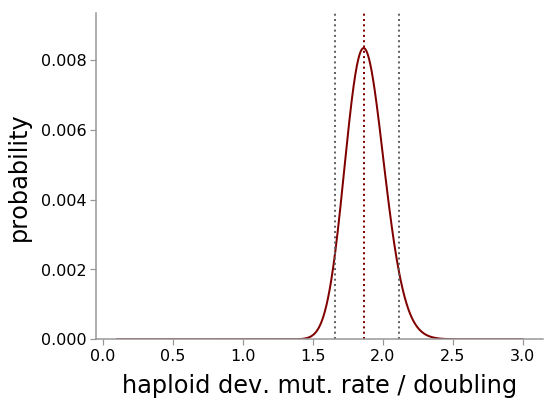

In [106]:
# Calculate the likelihood matrix and plot confidence interval 
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))

u_ben_min=0.1
u_ben_max=3

mut_list=np.linspace(u_ben_min, u_ben_max, 1000)

#MLE for increased mutation rate

squared_distance_cumulative_dev = np.array([squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par\
                                            ([mut], VAF_info_syn_cumulative, LeeSixtotal, log_phi, trimmed_lmax, n_bins_above_phi) for mut in mut_list])



logProbs_dev = (-squared_distance_cumulative_dev)
max_x= np.unravel_index(np.argmax(logProbs_dev), logProbs_dev.shape)
z_max = logProbs_dev[max_x]
z1_dev = np.exp(logProbs_dev-(z_max))
z1_dev_normalized= z1_dev/sum(z1_dev)
print('z1_dev_normalized normalized to:', sum(z1_dev_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_dev(mut_list, z1_dev_normalized, 'maroon')

# # x_major_ticks=[  1*10**-6, 2*10**-6,  3*10**-6, 4*10**-6, 5*10**-6,  6*10**-6, 7*10**-6, 8*10**-6,  9*10**-6, 10*10**-6]
# x_major_ticks=[  1*10**-7, 2*10**-7,  3*10**-7, 4*10**-7, 5*10**-7,  6*10**-7, 7*10**-7, 8*10**-7,  9*10**-7, 10*10**-7, 11*10**-7, 12*10**-7, 13*10**-7, 14*10**-7, 15*10**-7]
# x_major_tick_labels=[ '1', '2', '3', '4','5','6','7','8','9', '10', '11', '12', '13', '14', '15']
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)

# Axis labels
ax1.set_xlabel('haploid dev. mut. rate / doubling', fontsize = 24, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 24, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)


# ax1.set_title("$\phi={%s}$" % round(phi,3), fontsize = 24)
# plt.savefig('Lee_six_dev_phi_2percentVAF.pdf', bbox_inches='tight')
plt.show()


### best-fit developmental mutation rate for Chapman et al  (18-week fetus)

In [39]:
# fitting for developmental mutation rate per haploid per doubling
trimmed_fmax = 0.4999
trimmed_lmax=np.log(trimmed_fmax)

# approximately equivalent to only keeping variants that occur in 1 cell colonies 
Chapman_lower_limit = 0.3/100

phi_vector = [Chapman_lower_limit]
n_bins_above_phi_list = [10]
inferred_u_dev_vector=[]
for m in range(len(phi_vector)):

#     consider only data above 0.3% 
    phi=phi_vector[m]
    log_phi = np.log(phi)
    n_bins_above_phi = n_bins_above_phi_list[m]

    VAF_info_syn = VAF_densities_list(list_vaf_18wk_haem, Chapmantotal18wks, n_bins_above_phi, log_phi, trimmed_lmax)
    VAF_info_syn_cumulative = cumulative_VAF_densities_list(list_vaf_18wk_haem, Chapmantotal18wks, n_bins_above_phi, log_phi, trimmed_lmax)

#     print('number of nonempty bins:', len(VAF_info_syn))
#     print('number of bins:', len(VAF_info_syn_cumulative))

    # 1 parameter:  dev mut rate
    import scipy
    u_dev_guess=5

    initial_guess=[u_dev_guess]
    print('initial guess:', initial_guess)
    outcome=scipy.optimize.minimize(squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par, initial_guess, \
                                    args=(VAF_info_syn_cumulative, Chapmantotal18wks, log_phi, trimmed_lmax, n_bins_above_phi), method='nelder-mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for dev mutation rate:',  outcome.x)


    inferred_haploid_mut_per_doubling_Chapman18wks = outcome.x[0]
    inferred_u_dev_vector.append(inferred_haploid_mut_per_doubling_Chapman18wks)


initial guess: [5]
Success of fitting outcome is True
best-fit values for dev mutation rate: [1.00866699]


z1_dev_normalized normalized to: 1.0000000000000007
95% confidence interval for total driver mutation rate: lower = 0.9389389389389389
95% confidence interval for total driver mutation rate: upper = 1.0782782782782783


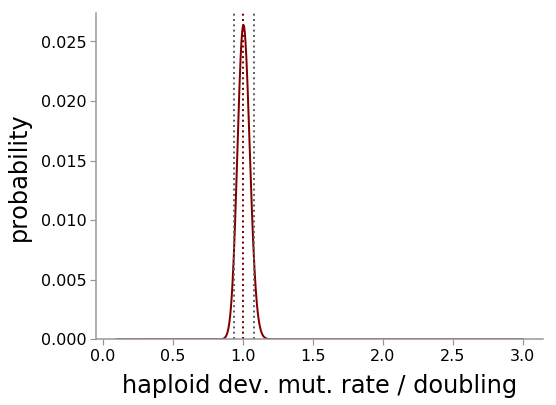

In [108]:
# Calculate the likelihood matrix and plot confidence interval 
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))

u_ben_min=0.1
u_ben_max=3

mut_list=np.linspace(u_ben_min, u_ben_max, 1000)

#MLE for increased mutation rate

squared_distance_cumulative_dev = np.array([squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par\
                                            ([mut], VAF_info_syn_cumulative, LeeSixtotal, log_phi, trimmed_lmax, n_bins_above_phi) for mut in mut_list])



logProbs_dev = (-squared_distance_cumulative_dev)
max_x= np.unravel_index(np.argmax(logProbs_dev), logProbs_dev.shape)
z_max = logProbs_dev[max_x]
z1_dev = np.exp(logProbs_dev-(z_max))
z1_dev_normalized= z1_dev/sum(z1_dev)
print('z1_dev_normalized normalized to:', sum(z1_dev_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_dev(mut_list, z1_dev_normalized, 'maroon')

# # x_major_ticks=[  1*10**-6, 2*10**-6,  3*10**-6, 4*10**-6, 5*10**-6,  6*10**-6, 7*10**-6, 8*10**-6,  9*10**-6, 10*10**-6]
# x_major_ticks=[  1*10**-7, 2*10**-7,  3*10**-7, 4*10**-7, 5*10**-7,  6*10**-7, 7*10**-7, 8*10**-7,  9*10**-7, 10*10**-7, 11*10**-7, 12*10**-7, 13*10**-7, 14*10**-7, 15*10**-7]
# x_major_tick_labels=[ '1', '2', '3', '4','5','6','7','8','9', '10', '11', '12', '13', '14', '15']
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)

# Axis labels
ax1.set_xlabel('haploid dev. mut. rate / doubling', fontsize = 24, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 24, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)


# ax1.set_title("$\phi={%s}$" % round(phi,3), fontsize = 24)
# plt.savefig('.pdf', bbox_inches='tight')
plt.show()


### best-fit developmental mutation rate for Chapman et al  (8-week fetus)

In [40]:
# fitting for developmental mutation rate per haploid per doubling
trimmed_fmax = 0.4999
trimmed_lmax=np.log(trimmed_fmax)

# approximately equivalent to only keeping variants that occur in 1 cell colonies 
Chapman_lower_limit = 0.3/100

phi_vector = [Chapman_lower_limit]
n_bins_above_phi_list = [10]
inferred_u_dev_vector=[]
for m in range(len(phi_vector)):

#     consider only data above 0.3% 
    phi=phi_vector[m]
    log_phi = np.log(phi)
    n_bins_above_phi = n_bins_above_phi_list[m]

    VAF_info_syn = VAF_densities_list(list_vaf_8wk_haem, Chapmantotal8wks, n_bins_above_phi, log_phi, trimmed_lmax)
    VAF_info_syn_cumulative = cumulative_VAF_densities_list(list_vaf_8wk_haem, Chapmantotal8wks, n_bins_above_phi, log_phi, trimmed_lmax)

#     print('number of nonempty bins:', len(VAF_info_syn))
#     print('number of bins:', len(VAF_info_syn_cumulative))

    # 1 parameter:  dev mut rate
    import scipy
    u_dev_guess=5

    initial_guess=[u_dev_guess]
    print('initial guess:', initial_guess)
    outcome=scipy.optimize.minimize(squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par, initial_guess, \
                                    args=(VAF_info_syn_cumulative, Chapmantotal8wks, log_phi, trimmed_lmax, n_bins_above_phi), method='nelder-mead', \
                                    options={'maxfev':1000000, 'maxiter':1000000} \
                                   )
    print('Success of fitting outcome is', outcome.success)

    print('best-fit values for dev mutation rate:',  outcome.x)


    inferred_haploid_mut_per_doubling_Chapman8wks=outcome.x[0]
    inferred_u_dev_vector.append(inferred_haploid_mut_per_doubling_Chapman8wks)


initial guess: [5]
Success of fitting outcome is True
best-fit values for dev mutation rate: [1.03497314]


C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:74: RuntimeWarning: divide by zero encountered in log


z1_dev_normalized normalized to: 0.9999999999999989
95% confidence interval for total driver mutation rate: lower = 0.9621621621621621
95% confidence interval for total driver mutation rate: upper = 1.1073073073073074


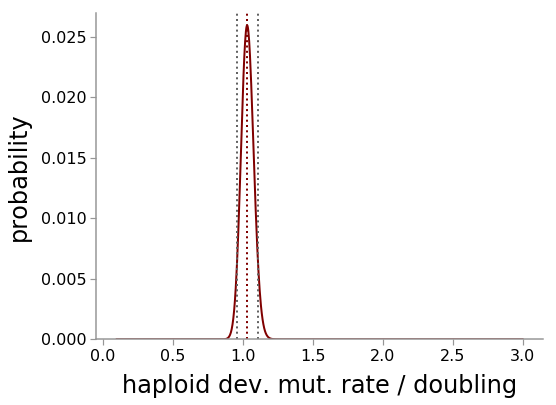

In [110]:
# Calculate the likelihood matrix and plot confidence interval 
plt.close('all')
f, ax1 = plt.subplots(1, 1, sharey=True, sharex = True, figsize=(8, 6))

u_ben_min=0.1
u_ben_max=3

mut_list=np.linspace(u_ben_min, u_ben_max, 1000)

#MLE for increased mutation rate

squared_distance_cumulative_dev = np.array([squared_distance_calculation_dev_cumulative_weightedbyerror_with_cutoff_one_par\
                                            ([mut], VAF_info_syn_cumulative, LeeSixtotal, log_phi, trimmed_lmax, n_bins_above_phi) for mut in mut_list])



logProbs_dev = (-squared_distance_cumulative_dev)
max_x= np.unravel_index(np.argmax(logProbs_dev), logProbs_dev.shape)
z_max = logProbs_dev[max_x]
z1_dev = np.exp(logProbs_dev-(z_max))
z1_dev_normalized= z1_dev/sum(z1_dev)
print('z1_dev_normalized normalized to:', sum(z1_dev_normalized))


mg_mut = np.meshgrid(mut_list)
ax1, min_s, max_s = confidence_interval_95_dev(mut_list, z1_dev_normalized, 'maroon')

# # x_major_ticks=[  1*10**-6, 2*10**-6,  3*10**-6, 4*10**-6, 5*10**-6,  6*10**-6, 7*10**-6, 8*10**-6,  9*10**-6, 10*10**-6]
# x_major_ticks=[  1*10**-7, 2*10**-7,  3*10**-7, 4*10**-7, 5*10**-7,  6*10**-7, 7*10**-7, 8*10**-7,  9*10**-7, 10*10**-7, 11*10**-7, 12*10**-7, 13*10**-7, 14*10**-7, 15*10**-7]
# x_major_tick_labels=[ '1', '2', '3', '4','5','6','7','8','9', '10', '11', '12', '13', '14', '15']
# ax1.set_xticks(x_major_ticks)
# ax1.set_xticklabels(x_major_tick_labels)

# Axis labels
ax1.set_xlabel('haploid dev. mut. rate / doubling', fontsize = 24, labelpad = 10, fontweight = 'medium')
ax1.set_ylabel('probability', fontsize = 24, labelpad = 10, fontweight = 'medium')

ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16, top = False, labeltop = False)
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6, labelsize = 16)


# ax1.set_title("$\phi={%s}$" % round(phi,3), fontsize = 24)
# plt.savefig('.pdf', bbox_inches='tight')
plt.show()


# Plotting reverse cumulative of the three datasets (Extended figure 2C)

In [43]:

def plot_log_hist_data_rcumulative_not_divided_by_binsize(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale):
    
    # create logged list
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
    
    normed_value = study_total
#     create a list of n_bins bin positions 'bins' and bin values 'hist'
    hist, bins = np.histogram(log_VAFs,  bins=np.linspace(lmin, lmax, n_bins))
#     should be constant binwidth
    widths = np.diff(bins)
    print('widths', type(widths))
    bin_centres = (bins[:-1] + bins[1:])/2

#     the bin values are turned into reverse cumulative
    hist=np.cumsum(hist[::-1])[::-1]
#     then normalized not by binwidth
    normalised_hist = hist/(normed_value)
#     then logged
#     normalised_hist = hist/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     widths_holder set to 1 for cumulative plots
    widths_holder = []
    for value in widths:
        widths_holder.append(int(1))
    widths_holder=np.array(widths_holder)
    print('widths_holder', type(widths_holder))
    errors = error_bars(hist, normed_value, widths_holder)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    ax1.errorbar(bin_centres, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    

    
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    print('min(log_hist_for_plot)',min(log_hist_for_plot))
    print('max(log_hist_for_plot)',max(log_hist_for_plot))

    ax1.set_xlim(np.log(10**-3), 0)

    

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]

                    
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)
    
    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = 20, labelpad = 4*scale, fontweight = 'medium')
    ax1.set_ylabel('reverse cumulative probability', fontsize = 20, labelpad = 6*scale, fontweight = 'medium')

    y_major_ticks = [np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)\
                    , np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),\
                    np.log(7000000),np.log(8000000),np.log(9000000),np.log(10000000)\
                    , np.log(20000000),np.log(30000000),np.log(40000000),np.log(50000000),np.log(60000000),\
                    np.log(70000000),np.log(80000000),np.log(90000000),np.log(100000000)]
    
    y_major_ticks = [c-np.log(10**3) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", \
                           "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$"\
                          ,"", "", "", "", "", "", "", "", "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1

def plot_log_hist_data_rcumulative_not_divided_by_binsize_shift_to_left(study_VAFs, study_total, n_bins, lmin, lmax, study_name, marker_name, marker_size, color, scale):
    
    # create logged list
    log_VAFs = []
    for i in study_VAFs:
        log_VAFs.append(np.log(float(i)))
    
    
    normed_value = study_total
#     create a list of n_bins bin positions 'bins' and bin values 'hist'
    hist, bins = np.histogram(log_VAFs,  bins=np.linspace(lmin, lmax, n_bins))
#     should be constant binwidth
    widths = np.diff(bins)
    print('widths', type(widths))
    cumulative_bins = bins[0: len(bins)-1]
    bin_centres = (bins[:-1] + bins[1:])/2

#     the bin values are turned into reverse cumulative
    hist=np.cumsum(hist[::-1])[::-1]
#     then normalized not by binwidth
    normalised_hist = hist/(normed_value)
#     then logged
#     normalised_hist = hist/(normed_value*width_scalar)
    log_hist_for_plot = np.log(normalised_hist)
    
#     widths_holder set to 1 for cumulative plots
    widths_holder = []
    for value in widths:
        widths_holder.append(int(1))
    widths_holder=np.array(widths_holder)
    print('widths_holder', type(widths_holder))
    errors = error_bars(hist, normed_value, widths_holder)
    
#     scale=1.2
    axisfont=14*scale
    axislabelfont=15*scale
    tpfont = 14*scale

    m_size = 15*1.2
    m_width = 1.5*1.2
    c_size = 7*1.2
    c_thick = 3*1.2
    e_width = 1.5*1.2

    ax1.errorbar(cumulative_bins, log_hist_for_plot, yerr= errors, fmt = marker_name, ecolor = grey5, \
                 elinewidth = e_width, capsize = c_size, capthick = c_thick, markersize = marker_size, markeredgewidth = m_width, \
                 markeredgecolor = grey5, markerfacecolor = color, label = study_name, zorder=3)
    

    
    print('log_hist_for_plot is', log_hist_for_plot)
    print('errors is', errors)
    
    # Set axis limits
    print('min(log_hist_for_plot)',min(log_hist_for_plot))
    print('max(log_hist_for_plot)',max(log_hist_for_plot))

    ax1.set_xlim(np.log(10**-3), 0)

    

    x_major_ticks =  [np.log(0.001), np.log(0.002),np.log(0.003),np.log(0.004),np.log(0.005),np.log(0.006),np.log(0.007),np.log(0.008),np.log(0.009), \
                     np.log(0.01),np.log(0.02),np.log(0.03),np.log(0.04),np.log(0.05),np.log(0.06),np.log(0.07),np.log(0.08),np.log(0.09),\
                     np.log(0.1),np.log(0.2),np.log(0.3),np.log(0.4),np.log(0.5),np.log(0.6),np.log(0.7),np.log(0.8),np.log(0.9), np.log(1.0)]

                    
    x_major_tick_labels =  [ "0.1","","","","","","","","",\
                           "1","","","","","","","","",\
                           "10","","","","50","","","","",""]

                         
    ax1.set_xticks(x_major_ticks)
    ax1.set_xticklabels(x_major_tick_labels, fontsize = axisfont)
    ax1.xaxis.set_tick_params(width=scale, color = grey3, length = 6)
    
    # Axis labels
    ax1.set_xlabel('variant allele frequency (%)', fontsize = 20, labelpad = 4*scale, fontweight = 'medium')
    ax1.set_ylabel('reverse cumulative probability', fontsize = 20, labelpad = 6*scale, fontweight = 'medium')

    y_major_ticks = [np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000),np.log(300000),np.log(400000),np.log(500000),np.log(600000),\
                    np.log(700000),np.log(800000),np.log(900000),np.log(1000000)\
                    , np.log(2000000),np.log(3000000),np.log(4000000),np.log(5000000),np.log(6000000),\
                    np.log(7000000),np.log(8000000),np.log(9000000),np.log(10000000)\
                    , np.log(20000000),np.log(30000000),np.log(40000000),np.log(50000000),np.log(60000000),\
                    np.log(70000000),np.log(80000000),np.log(90000000),np.log(100000000)]
    
    y_major_ticks = [c-np.log(10**3) for c in y_major_ticks]
    y_major_tick_labels = ["" ,"", "", "", "", "", "", "", "", \
                           "$10^{0}$","", "", "", "", "", "", "", "", \
                           "$10^{1}$","", "", "", "", "", "", "", "", "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$"\
                          ,"", "", "", "", "", "", "", "", "$10^{4}$","", "", "", "", "", "", "", "", "$10^{5}$"]
    ax1.set_yticks(y_major_ticks)
    ax1.set_yticklabels(y_major_tick_labels, fontsize = axisfont)
    ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

    #Only show the required axis lines
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_linewidth(1.5)

    for axis in ['bottom','left']:
        ax1.spines[axis].set_color(grey3)

    return ax1


In [41]:
# trim Lee Six data
# approximately equivalent to only keeping variants that occur in at least 3 cell colonies
Lee_Six_lower_limit = 2/100

print('Before trimming, there are', len(list_of_mut_VAF_Lee_Six), 'somatic SNVs.')
list_of_mut_VAF_Lee_Six_trimmed = []
for vaf in list_of_mut_VAF_Lee_Six:
     if vaf > Lee_Six_lower_limit:
            list_of_mut_VAF_Lee_Six_trimmed.append(vaf)
            
print('After trimming, ', len(list_of_mut_VAF_Lee_Six_trimmed), 'remains')

Before trimming, there are 130904 somatic SNVs.
After trimming,  155 remains


In [45]:
print('inferred_haploid_mut_per_doubling_Lee_Six: ', inferred_haploid_mut_per_doubling_Lee_Six)
print('inferred_haploid_mut_per_doubling_Chapman18wks: ', inferred_haploid_mut_per_doubling_Chapman18wks)
print('inferred_haploid_mut_per_doubling_Chapman8wks: ', inferred_haploid_mut_per_doubling_Chapman8wks)

inferred_haploid_mut_per_doubling_Lee_Six:  1.8643798828125
inferred_haploid_mut_per_doubling_Chapman18wks:  1.0086669921875
inferred_haploid_mut_per_doubling_Chapman8wks:  1.03497314453125


widths <class 'numpy.ndarray'>
widths_holder <class 'numpy.ndarray'>
log_hist_for_plot is [5.04342512 4.56434819 4.00733319 3.52636052 2.94443898 2.83321334
 2.63905733 1.79175947 0.69314718       -inf]
errors is [(0.08373159723242907, 0.1076543362494169, 0.1448407862625114, 0.18813673438313216, 0.2606062646867686, 0.277778772455481, 0.3109660415933355, 0.5246681416422598, 1.2279471772995159, nan), (0.07725908272681092, 0.09718303638212245, 0.12649164759431475, 0.1582837712334504, 0.20653904341649332, 0.21715415063904597, 0.2368580694396143, 0.3423465848483054, 0.5347999967395703, nan)]
min(log_hist_for_plot) -inf
max(log_hist_for_plot) 5.043425116919247
widths <class 'numpy.ndarray'>
widths_holder <class 'numpy.ndarray'>
log_hist_for_plot is [6.24027585 5.7365723  4.92725369 4.17438727 3.68887945 3.33220451
 2.94443898 2.56494936 1.94591015 1.38629436]
errors is [(0.04515541039487303, 0.058472883355698, 0.0889685489026455, 0.1324288401894247, 0.1721105268664389, 0.2094653219063658, 0.

C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:140: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log
C:\Users\chickchick\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


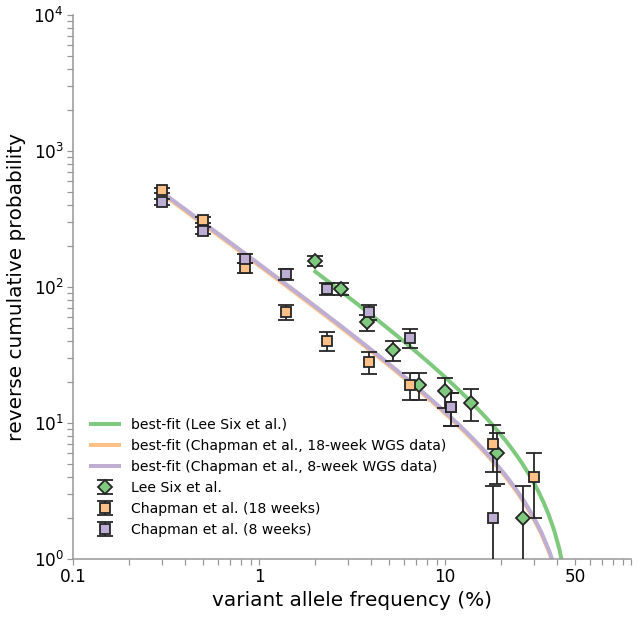

In [44]:
#Plotting the histogram
plt.close('all')
scale = 1.2
f, (ax1) = plt.subplots(1, 1, sharey=True, figsize=(10, 10))
font = {'weight' : 'normal','size'   : 16}

lmin = np.log(0.3/100)
lmax = np.log(0.49999)
m_size = 11

Chapmanmarkersize = m_size*0.9
Chapmanmarker='s'
Chapmantotal18wks = 1
Chapmantotal8wks = 1
Chapman_mut_rate = 0.5
Chapman_bins = 11
Chapman18wkscolor = '#fdc086'
Chapman8wkscolor ='#beaed4'

LeeSixmarkersize = m_size*0.9
LeeSixmarker='D'
LeeSixtotal = 1
LeeSix_mut_rate = 0.5
LeeSix_bins = 11
LeeSixcolor = '#7fc97f'

plot_log_hist_data_rcumulative_not_divided_by_binsize_shift_to_left(list_of_mut_VAF_Lee_Six_trimmed, LeeSixtotal, LeeSix_bins,\
                                                      np.log(Lee_Six_lower_limit), lmax, 'Lee Six et al.', LeeSixmarker, LeeSixmarkersize, LeeSixcolor, scale)

plot_log_hist_data_rcumulative_not_divided_by_binsize_shift_to_left(list_vaf_18wk_haem, Chapmantotal18wks, Chapman_bins,\
                                                      lmin, lmax, 'Chapman et al. (18 weeks)', Chapmanmarker, Chapmanmarkersize, Chapman18wkscolor, scale)

plot_log_hist_data_rcumulative_not_divided_by_binsize_shift_to_left(list_vaf_8wk_haem, Chapmantotal8wks,  Chapman_bins,\
                                                      lmin, lmax, 'Chapman et al. (8 weeks)', Chapmanmarker, Chapmanmarkersize, Chapman8wkscolor, scale)

Chapman_8wks_binsize = (lmax - lmin)/(Chapman_bins-1)
Chapman_18wks_binsize = (lmax - lmin)/(Chapman_bins-1)
Lee_Six_binsize = (lmax - lmin)/(LeeSix_bins-1)

x_passenger=np.linspace(np.log(Lee_Six_lower_limit), np.log(0.4999), 50)
early_developmentals_Lee_Six_y=[np.log(integrate.quad(lambda l: linProbtheory_ages_dev_not_rescaled_for_integration(l, inferred_haploid_mut_per_doubling_Lee_Six), l_var, lmax)[0]) for l_var in x_passenger]
ax1.plot(x_passenger, early_developmentals_Lee_Six_y, c = LeeSixcolor, lw = 4, label= 'best-fit (Lee Six et al.)')

x_passenger=np.linspace(np.log(Chapman_lower_limit), np.log(0.4999), 50)
early_developmentals_Chapman18wks_y=[np.log(integrate.quad(lambda l: linProbtheory_ages_dev_not_rescaled_for_integration(l, inferred_haploid_mut_per_doubling_Chapman18wks), l_var, lmax)[0]) for l_var in x_passenger]
ax1.plot(x_passenger, early_developmentals_Chapman18wks_y, c = Chapman18wkscolor, lw = 4, label= 'best-fit (Chapman et al., 18-week WGS data)')

x_passenger=np.linspace(np.log(Chapman_lower_limit), np.log(0.4999), 50)
early_developmentals_Chapman8wks_y=[np.log(integrate.quad(lambda l: linProbtheory_ages_dev_not_rescaled_for_integration(l, inferred_haploid_mut_per_doubling_Chapman8wks), l_var, lmax)[0]) for l_var in x_passenger]
ax1.plot(x_passenger, early_developmentals_Chapman8wks_y, c = Chapman8wkscolor, lw = 4, label= 'best-fit (Chapman et al., 8-week WGS data)')


y_major_ticks = [np.log(10), np.log(20), np.log(30),\
                     np.log(40), np.log(50), np.log(60), \
                     np.log(70), np.log(80), np.log(90),\
                     np.log(100), np.log(200), np.log(300), \
                     np.log(400), np.log(500), np.log(600),\
                     np.log(700), np.log(800), np.log(900), \
                     np.log(1000), np.log(2000), np.log(3000),\
                    np.log(4000), np.log(5000), np.log(6000), \
                     np.log(7000), np.log(8000), np.log(9000),\
                    np.log(10000), np.log(20000), np.log(30000), \
                     np.log(40000), np.log(50000), np.log(60000),\
                    np.log(70000), np.log(80000), np.log(90000), \
                     np.log(100000), np.log(200000), np.log(300000), \
                     np.log(400000), np.log(500000), np.log(600000),\
                    np.log(700000), np.log(800000), np.log(900000), \
                     np.log(1000000)]
y_major_ticks = [c+np.log(1/10**2) for c in y_major_ticks]
y_major_tick_labels = ["","","", "", "", "", "", "", "", 
                       "$10^{0}$","", "", "", "", "", "", "", "", "$10^{1}$","", "", "", "", "", "", "", "", \
                       "$10^{2}$","", "", "", "", "", "", "", "", "$10^{3}$","", "", "", "", "", "", "", "", "$10^{4}$"]
ax1.set_yticks(y_major_ticks)
ax1.set_yticklabels(y_major_tick_labels)
ax1.set_ylim(np.log(10**0),np.log(10**4))
ax1.yaxis.set_tick_params(width=scale, color = grey3, length = 6)

ax1.legend(ncol=1, loc='center', bbox_to_anchor=(0.35, 0.15), frameon=0, fontsize = 14)


# plt.savefig('Chapman_putative_colonies_Lee_Six_data_all_with_prediction_rcumulative_with_binsize_accounted_for.pdf',bbox_inches='tight')

plt.show()
